In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns 


%matplotlib inline

In [2]:
data = pd.read_csv('housing.data2.txt', header=None, sep='\s+')
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
data.isnull().sum()  #check if there are missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

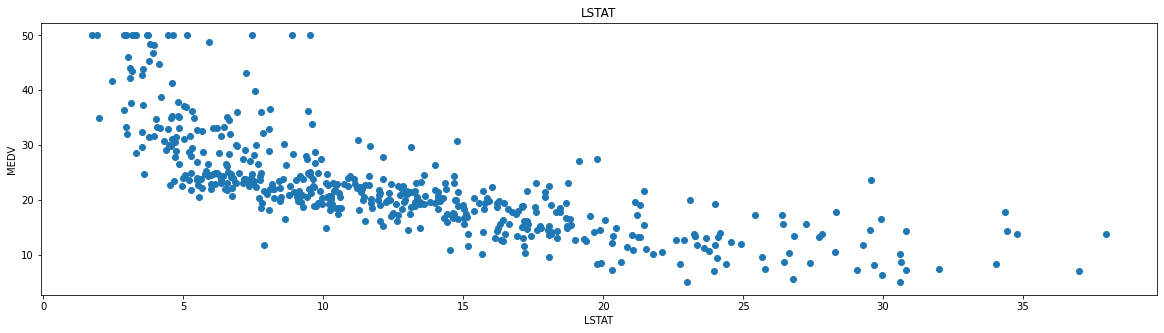

In [4]:
plt.figure(figsize=(20, 5))

features = ['LSTAT']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
data2 = pd.DataFrame()
data2['LSTAT'], data2['MEDV'] = data['LSTAT'], data['MEDV']

In [16]:
#for linear regression
X_train, X_test, y_train, y_test = train_test_split(data2['MEDV'], data['LSTAT'])

X_train_data, X_test_data = pd.DataFrame(X_train), pd.DataFrame(X_test)

x_axis = np.arange(0, 50, 0.1)


#quadpoly
quadpoly = PolynomialFeatures(degree = 2)
X_train_poly, X_test_poly= quadpoly.fit_transform(X_train_data), quadpoly.fit_transform(X_test_data)
model = linear_model.LinearRegression()
model = model.fit(X_train_poly, y_train)
coefficient = model.coef_
intercept = model.intercept_

#y_test_predict_lin = lin_model.predict(X_test)
#r2 linear regression test
#r2 = r2_score(Y_test_lin, y_test_predict_lin)
#print('R2 score for lineare regression is {}'.format(r2))

predictionquad = model.predict(X_test_poly)#prediction quad poly
quad = intercept + coefficient[1] * x_axis + coefficient[2] * x_axis **2


r2_score or quadratic : 0.521138198706222


In [37]:
lin = PolynomialFeatures(degree = 1)
X_train_lin, X_test_lin= lin.fit_transform(X_train_data), lin.fit_transform(X_test_data)
modellin = linear_model.LinearRegression()
modellin = modellin.fit(X_train_lin, y_train)
coefficientlin = modellin.coef_
interceptlin = modellin.intercept_

predictionlin = modellin.predict(X_test_lin)



In [45]:
#cubic poly
cubicpoly = PolynomialFeatures(degree = 3)
X_train_polycubic, X_test_polycubic= cubicpoly.fit_transform(X_train_data), cubicpoly.fit_transform(X_test_data)
modelcub = linear_model.LinearRegression()
modelcub = modelcub.fit(X_train_polycubic, y_train)

coefficientcub = modelcub.coef_
interceptcub = modelcub.intercept_

predictioncub = modelcub.predict(X_test_polycubic)#prediction cub poly

coef1= coefficientcub[1] * x_axis
coef2=coefficientcub[2] * x_axis **2
coef3 = coefficientcub[3]* x_axis **3
cubic = interceptcub + coef1 + coef2 + coef3


r2_score or quadratic : 0.521138198706222
r2_score or linear : 0.105004926550892
r2_score or cubic : 0.5212647674941248


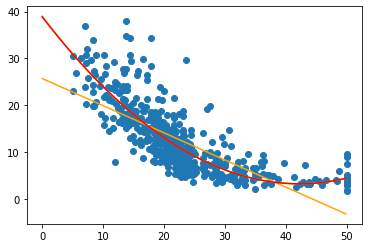

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

#x_axis = np.arange(5, 50, 0.1)


lin = interceptlin + coefficientlin[1] * x_axis 
#quad = intercept + coefficient[1] * x_axis + coefficient[2] * x_axis **2
#cubic = interceptcub + coefficientcub[1] * x_axis + (coefficientcub[2] * x_axis **2) + (coefficientcub[3]*np.power(x_axis, 3))

#r2 score for the quad
r2 = r2_score(predictionquad, y_test)
print("r2_score or quadratic :", r2)

#r2 score for the linear
r2b = r2_score(predictionlin, y_test)
print("r2_score or linear :", r2b)

#r2 score for the cubic
r2c = r2_score(predictioncub, y_test)
print("r2_score or cubic :", r2c)

plt.scatter(data2['MEDV'], data2['LSTAT'])
plt.plot(x_axis, cubic, color = 'y')
plt.plot(x_axis, lin, color = 'orange')
plt.plot(x_axis, quad, color = 'r')

#plt.legend
plt.show()


In [14]:
print('the quadratic seems to fit the best but mainly because i could not graph the cubic linear for some reosn. ')

the quadratic seems to fit the best but mainly because i could not graph the cubic linear for some reosn. 
